In [1]:
# importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

In [2]:
# create dataframe
first_df = pd.DataFrame({'X1': np.random.randint(1, 15, 20), 'X2': np.random.randint(1, 15, 20), 
                         'label': np.random.randint(0, 2, 20)})
first_df

,X1,X2,label
0,5,12,1
1,11,3,0
2,3,8,1
3,13,2,1
4,12,4,1
5,9,8,1
6,8,4,0
7,8,14,0
8,4,4,1
9,10,9,0


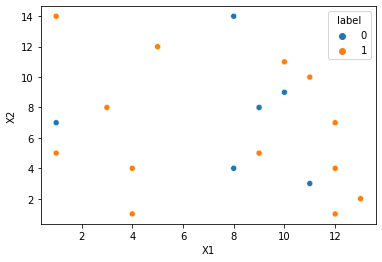

In [3]:
# plotting scatter plot
sns.scatterplot(x=first_df['X1'], y=first_df['X2'], hue=first_df['label'])
plt.show()

In [4]:
# assign weights to data points
first_df['weight'] = 2/first_df.shape[0]
first_df

,X1,X2,label,weight
0,5,12,1,0.1
1,11,3,0,0.1
2,3,8,1,0.1
3,13,2,1,0.1
4,12,4,1,0.1
5,9,8,1,0.1
6,8,4,0,0.1
7,8,14,0,0.1
8,4,4,1,0.1
9,10,9,0,0.1


### Adaboost Iteration 1

In [5]:
# define decision tree classifier 
dt_classifier_1 = DecisionTreeClassifier(max_depth=1)

In [6]:
# putting feature variable to X
X = first_df.iloc[:, 0:2].values

# putting response variable to y
y = first_df.iloc[:, 2].values

In [7]:
# fit decision tree classifier
dt_classifier_1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

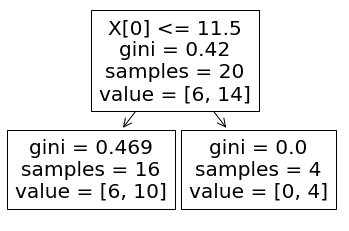

In [8]:
# plotting decision tree
plot_tree(dt_classifier_1);

C:\Users\thaku\anaconda3\envs\deep-learning\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

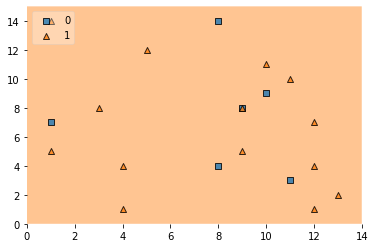

In [9]:
# plotting decision boundries
plot_decision_regions(X, y, clf=dt_classifier_1, legend=2)

In [10]:
# getting predictions
first_df['prediction'] = dt_classifier_1.predict(X)
first_df

,X1,X2,label,weight,prediction
0,5,12,1,0.1,1
1,11,3,0,0.1,1
2,3,8,1,0.1,1
3,13,2,1,0.1,1
4,12,4,1,0.1,1
5,9,8,1,0.1,1
6,8,4,0,0.1,1
7,8,14,0,0.1,1
8,4,4,1,0.1,1
9,10,9,0,0.1,1


As we can see there are 6 misclassification for index 1, 6, 7, 9, 14, 17 

So total_error = 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 = 0.6 

In [11]:
# function to compute model weights based on error
def compute_model_weights(total_error):
    return 0.5 * np.log(1 - total_error)/(total_error)

In [12]:
# calculate model weights - alpha value
alpha_1 = compute_model_weights(0.6)
alpha_1

-0.7635756098951292

In [13]:
# function to update weights - row wise based on classification
def update_row_weights(row, alpha=0.0000001):
    if row.label == row.prediction:
        return row.weight * np.exp(-alpha)
    else:
        return row.weight * np.exp(alpha)

In [14]:
# update weigths
first_df['updated_weight'] = first_df.apply(update_row_weights, alpha=0.763, axis=1)
first_df

,X1,X2,label,weight,prediction,updated_weight
0,5,12,1,0.1,1,0.046627
1,11,3,0,0.1,1,0.214470
2,3,8,1,0.1,1,0.046627
3,13,2,1,0.1,1,0.046627
4,12,4,1,0.1,1,0.046627
5,9,8,1,0.1,1,0.046627
6,8,4,0,0.1,1,0.214470
7,8,14,0,0.1,1,0.214470
8,4,4,1,0.1,1,0.046627
9,10,9,0,0.1,1,0.214470


In [15]:
# check sum of weights
first_df['updated_weight'].sum()

1.9395921507932905

In [16]:
# normalizing the weights
first_df['nomalized_weight'] = first_df['updated_weight']/first_df['updated_weight'].sum()
first_df

,X1,X2,label,weight,prediction,updated_weight,nomalized_weight
0,5,12,1,0.1,1,0.046627,0.024039
1,11,3,0,0.1,1,0.214470,0.110575
2,3,8,1,0.1,1,0.046627,0.024039
3,13,2,1,0.1,1,0.046627,0.024039
4,12,4,1,0.1,1,0.046627,0.024039
5,9,8,1,0.1,1,0.046627,0.024039
6,8,4,0,0.1,1,0.214470,0.110575
7,8,14,0,0.1,1,0.214470,0.110575
8,4,4,1,0.1,1,0.046627,0.024039
9,10,9,0,0.1,1,0.214470,0.110575


In [17]:
# check normalized weights sum
first_df['nomalized_weight'].sum()

1.0000000000000002

In [18]:
# define upper and lower limits
first_df['cumsum_upper'] = np.cumsum(first_df['nomalized_weight'])
first_df['cumsum_lower'] = first_df['cumsum_upper'] - first_df['nomalized_weight']
first_df

,X1,X2,label,weight,prediction,updated_weight,nomalized_weight,cumsum_upper,cumsum_lower
0,5,12,1,0.1,1,0.046627,0.024039,0.024039,0.000000
1,11,3,0,0.1,1,0.214470,0.110575,0.134614,0.024039
2,3,8,1,0.1,1,0.046627,0.024039,0.158654,0.134614
3,13,2,1,0.1,1,0.046627,0.024039,0.182693,0.158654
4,12,4,1,0.1,1,0.046627,0.024039,0.206732,0.182693
5,9,8,1,0.1,1,0.046627,0.024039,0.230772,0.206732
6,8,4,0,0.1,1,0.214470,0.110575,0.341346,0.230772
7,8,14,0,0.1,1,0.214470,0.110575,0.451921,0.341346
8,4,4,1,0.1,1,0.046627,0.024039,0.475961,0.451921
9,10,9,0,0.1,1,0.214470,0.110575,0.586535,0.475961


In [19]:
# function to create creating new dataset (upsampling)
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [20]:
# get index values for new dataset
index_values = create_new_dataset(first_df)
index_values

[15, 14, 18, 14, 6, 7, 11, 6, 7, 18, 6, 7, 14, 13, 17, 7, 12, 1, 14, 3]

As we can see our missclassified index were 1, 6, 7, 9, 14, 17. If we notice we can see that mostly these index points are available.

In [21]:
# create new dataframe with index values and with first 4 features
second_df = first_df.iloc[index_values, [0, 1, 2, 3]].reset_index()
second_df.drop('index', axis=1, inplace=True)
second_df

,X1,X2,label,weight
0,12,1,1,0.1
1,1,7,0,0.1
2,11,10,1,0.1
3,1,7,0,0.1
4,8,4,0,0.1
5,8,14,0,0.1
6,12,7,1,0.1
7,8,4,0,0.1
8,8,14,0,0.1
9,11,10,1,0.1


### Adaboost Iteration 2

In [22]:
# define decision tree classifier 
dt_classifier_2 = DecisionTreeClassifier(max_depth=1)

In [23]:
# putting feature variable to X
X = second_df.iloc[:, 0:2].values

# putting response variable to y
y = second_df.iloc[:, 2].values

In [24]:
# fit decision tree classifier
dt_classifier_2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

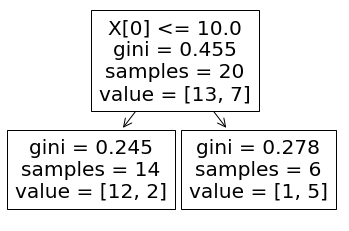

In [25]:
# plotting decision tree
plot_tree(dt_classifier_2);

<AxesSubplot:>

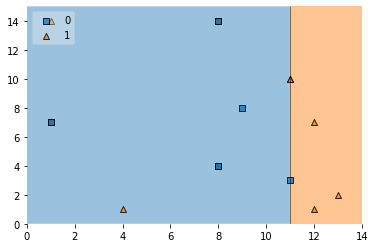

In [26]:
# plotting decision boundries
plot_decision_regions(X, y, clf=dt_classifier_2, legend=2)

In [27]:
# getting predictions
second_df['prediction'] = dt_classifier_2.predict(X)
second_df

,X1,X2,label,weight,prediction
0,12,1,1,0.1,1
1,1,7,0,0.1,0
2,11,10,1,0.1,1
3,1,7,0,0.1,0
4,8,4,0,0.1,0
5,8,14,0,0.1,0
6,12,7,1,0.1,1
7,8,4,0,0.1,0
8,8,14,0,0.1,0
9,11,10,1,0.1,1


As we can see there are 3 misclassification for index 13, 16, 17

So total_error = 0.1 + 0.1 + 0.1 = 0.3

In [28]:
# calculate model weights - alpha value
alpha_2 = compute_model_weights(0.3)
alpha_2

-0.5944582398978875

In [30]:
# update weigths
second_df['updated_weight'] = second_df.apply(update_row_weights, alpha=0.594, axis=1)
second_df

,X1,X2,label,weight,prediction,updated_weight
0,12,1,1,0.1,1,0.055211
1,1,7,0,0.1,0,0.055211
2,11,10,1,0.1,1,0.055211
3,1,7,0,0.1,0,0.055211
4,8,4,0,0.1,0,0.055211
5,8,14,0,0.1,0,0.055211
6,12,7,1,0.1,1,0.055211
7,8,4,0,0.1,0,0.055211
8,8,14,0,0.1,0,0.055211
9,11,10,1,0.1,1,0.055211


In [31]:
# normalizing the weights
second_df['nomalized_weight'] = second_df['updated_weight']/second_df['updated_weight'].sum()
second_df

,X1,X2,label,weight,prediction,updated_weight,nomalized_weight
0,12,1,1,0.1,1,0.055211,0.037256
1,1,7,0,0.1,0,0.055211,0.037256
2,11,10,1,0.1,1,0.055211,0.037256
3,1,7,0,0.1,0,0.055211,0.037256
4,8,4,0,0.1,0,0.055211,0.037256
5,8,14,0,0.1,0,0.055211,0.037256
6,12,7,1,0.1,1,0.055211,0.037256
7,8,4,0,0.1,0,0.055211,0.037256
8,8,14,0,0.1,0,0.055211,0.037256
9,11,10,1,0.1,1,0.055211,0.037256


In [32]:
# check normalized weights sum
second_df['nomalized_weight'].sum()

0.9999999999999998

In [33]:
# define upper and lower limits
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weight'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weight']
second_df

,X1,X2,label,weight,prediction,updated_weight,nomalized_weight,cumsum_upper,cumsum_lower
0,12,1,1,0.1,1,0.055211,0.037256,0.037256,0.000000
1,1,7,0,0.1,0,0.055211,0.037256,0.074511,0.037256
2,11,10,1,0.1,1,0.055211,0.037256,0.111767,0.074511
3,1,7,0,0.1,0,0.055211,0.037256,0.149023,0.111767
4,8,4,0,0.1,0,0.055211,0.037256,0.186278,0.149023
5,8,14,0,0.1,0,0.055211,0.037256,0.223534,0.186278
6,12,7,1,0.1,1,0.055211,0.037256,0.260790,0.223534
7,8,4,0,0.1,0,0.055211,0.037256,0.298045,0.260790
8,8,14,0,0.1,0,0.055211,0.037256,0.335301,0.298045
9,11,10,1,0.1,1,0.055211,0.037256,0.372557,0.335301


In [34]:
# get index values for new dataset
index_values = create_new_dataset(second_df)
index_values

[19, 13, 13, 16, 14, 1, 7, 2, 2, 13, 13, 13, 1, 13, 16, 13, 17, 17, 17, 11]

In [35]:
# create new dataframe with index values and with first 4 features
third_df = second_df.iloc[index_values, [0, 1, 2, 3]].reset_index()
third_df.drop('index', axis=1, inplace=True)
third_df

,X1,X2,label,weight
0,13,2,1,0.1
1,1,14,1,0.1
2,1,14,1,0.1
3,4,1,1,0.1
4,9,8,0,0.1
5,1,7,0,0.1
6,8,4,0,0.1
7,11,10,1,0.1
8,11,10,1,0.1
9,1,14,1,0.1


### Adaboost Iteration 3

In [36]:
# define decision tree classifier 
dt_classifier_3 = DecisionTreeClassifier(max_depth=1)

In [37]:
# putting feature variable to X
X = third_df.iloc[:, 0:2].values

# putting response variable to y
y = third_df.iloc[:, 2].values

In [39]:
# fit decision tree classifier
dt_classifier_3.fit(X, y)

DecisionTreeClassifier(max_depth=1)

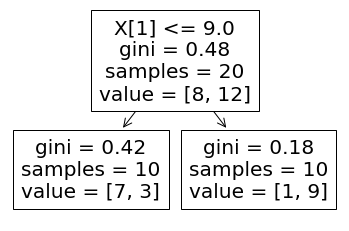

In [40]:
# plotting decision tree
plot_tree(dt_classifier_3);

<AxesSubplot:>

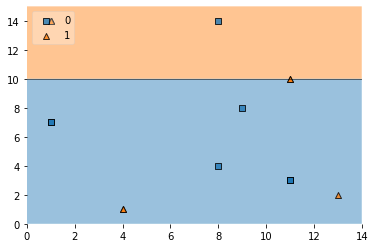

In [41]:
# plotting decision boundries
plot_decision_regions(X, y, clf=dt_classifier_3, legend=2)

In [42]:
# getting predictions
third_df['prediction'] = dt_classifier_3.predict(X)
third_df

,X1,X2,label,weight,prediction
0,13,2,1,0.1,0
1,1,14,1,0.1,1
2,1,14,1,0.1,1
3,4,1,1,0.1,0
4,9,8,0,0.1,0
5,1,7,0,0.1,0
6,8,4,0,0.1,0
7,11,10,1,0.1,1
8,11,10,1,0.1,1
9,1,14,1,0.1,1


As we can see there are 4 misclassification for index 0, 3, 14, 19

So total_error = 0.1 + 0.1 + 0.1 + 0.1 = 0.4  

In [44]:
# calculate model weights - alpha value
alpha_3 = compute_model_weights(0.4)
alpha_3

-0.6385320297074883

### Prediction

In [52]:
# define data point 1 from first dataframe -> y true for this is 1
data_point_1 = np.array([11, 10]).reshape(1, 2)

# get predictions
pred_dt_1 =  dt_classifier_1.predict(data_point_1)
pred_dt_2 =  dt_classifier_2.predict(data_point_1)
pred_dt_3 =  dt_classifier_3.predict(data_point_1)

# final prediction
np.sign(alpha_1 * pred_dt_1[0] + alpha_2 * pred_dt_2[0] + alpha_3 * pred_dt_3[0])

-1.0

In [53]:
# define data point 2 from first dataframe -> y true for this is 0
data_point_2 = np.array([1, 7]).reshape(1, 2)

# get predictions
pred_dt_1 =  dt_classifier_1.predict(data_point_2)
pred_dt_2 =  dt_classifier_2.predict(data_point_2)
pred_dt_3 =  dt_classifier_3.predict(data_point_2)

# final prediction
np.sign(alpha_1 * pred_dt_1[0] + alpha_2 * pred_dt_2[0] + alpha_3 * pred_dt_3[0])

-1.0